# HR Data


In [37]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as m
from sklearn import tree

%matplotlib inline

### Step 1: Data Acquisition

In [38]:
data=pd.read_csv("/home/ubuntu/HR_comma_sep.csv")

In [39]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Step 2: Data Preparation and cleaning

In [40]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

** Assigning **<br>
sales:1<br>
accounting:2<br>hr:3<br>technical:4<br>support:5<br>management:6<br>
It:7<br>product_mng:8<br>marketing:9<br>RandD:10

In [41]:
data=data.replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'],[1,2,3,4,5,6,7,8,9,10])

In [42]:
data.shape

(15000, 10)

In [43]:
data.isnull().values.any()

False

In [44]:
data=data.replace("low",0)
data=data.replace("medium",0.5)
data=data.replace("high",1)
data.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14990,0.43,0.57,2,159,3,1,1,0,4,0.0
14991,0.89,0.88,5,228,5,1,1,0,5,0.0
14992,0.09,0.81,6,257,4,0,1,0,5,0.0
14993,0.40,0.48,2,155,3,0,1,0,5,0.0
14994,0.76,0.83,6,293,6,0,1,0,5,0.0
14995,0.40,0.57,2,151,3,0,1,0,5,0.0
14996,0.37,0.48,2,160,3,0,1,0,5,0.0
14997,0.37,0.53,2,143,3,0,1,0,5,0.0
14998,0.11,0.96,6,280,4,0,1,0,5,0.0
14999,0.37,0.52,2,158,3,0,1,0,5,0.0


In [22]:
corr=data.corr()
print(corr)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105052       -0.142898   
last_evaluation                  0.105052         1.000000        0.349382   
number_project                  -0.142898         0.349382        1.000000   
average_montly_hours            -0.019996         0.339787        0.417281   
time_spend_company              -0.100850         0.131606        0.196804   
Work_accident                    0.058713        -0.007081       -0.004700   
left                            -0.388402         0.006464        0.023609   
promotion_last_5years            0.025611        -0.008675       -0.006049   
sales                            0.015461         0.011922        0.005692   
salary                           0.050059        -0.012948       -0.001712   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.019996           -0.100850   
last_ev

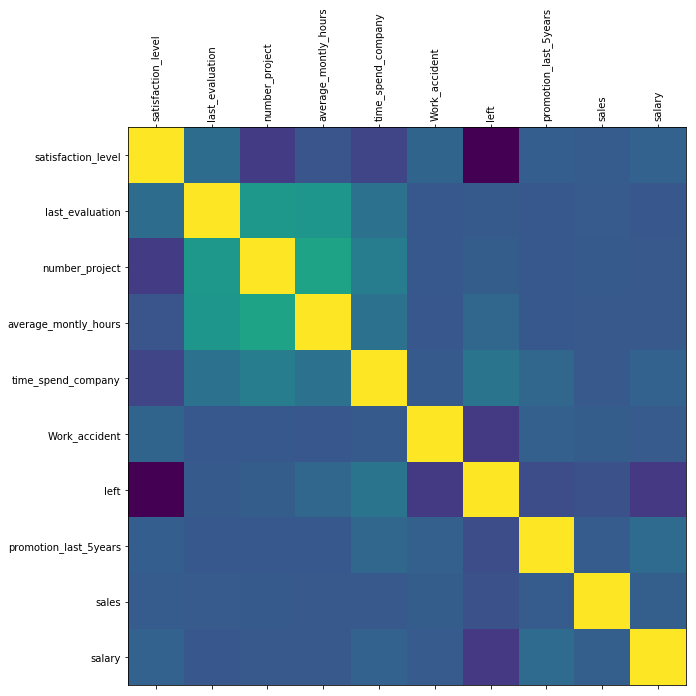

In [24]:
plt.rcParams["figure.figsize"]=(10,10)
plt.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

** Matrix **
<br>
Blue -> Cyan -> Yellow -> Red -> DarkRed : Less to more correlated<br><br>
### Step 3: Data Analysis

** Model Selection **

In [25]:
arr=data.values
X=np.concatenate((arr[:,:6],arr[:,7:]),axis=1)
Y=arr[:,6]
seed=7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=0.20,random_state=seed)
scoring="accuracy"

In [26]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=150,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,scoring=scoring,cv=kfold)
    names.append(name)
    results.append(cv_results)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.792667 (0.043185)
KNN: 0.933000 (0.030079)
DTC: 0.978333 (0.016051)


** Training and Prediction **

In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
predictions=dtc.predict(X_validation)
print("Accuracy Score:")
print(m.accuracy_score(Y_validation,predictions))
print("Confusion Matrix:")
print(m.confusion_matrix(Y_validation,predictions))
print("Classification Report:")
print(m.classification_report(Y_validation,predictions))

Accuracy Score:
0.981333333333
Confusion Matrix:
[[2265   38]
 [  18  679]]
Classification Report:
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.99      2303
        1.0       0.95      0.97      0.96       697

avg / total       0.98      0.98      0.98      3000



In [28]:
a=([[0.88,0.76,8,240,8,0,0,0,1]])
dtc.predict(a)

array([ 0.])

0: Will not Leave<br>
1: Will Leave

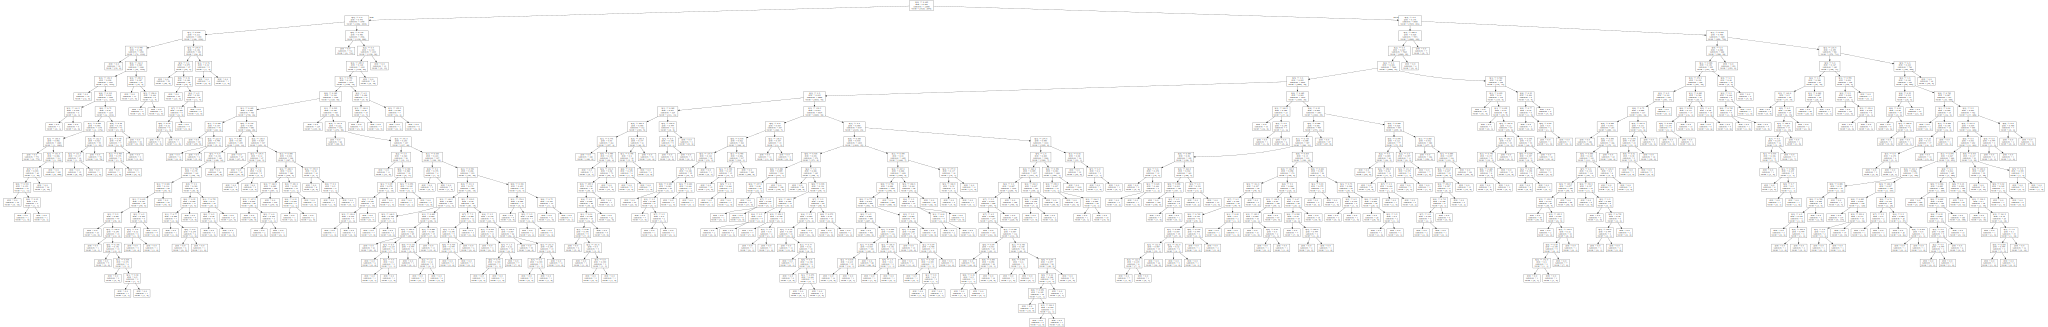

In [30]:
with open("HR_Tree.dot", "w") as f:
    tree.export_graphviz(dtc, out_file=f)
DT = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(DT)
graph

Convert the dot file to pdf using the command: <br>
$dot -Tpdf HR_Tree.dot -o HR_Tree.pdf

In [62]:
sample=(data.loc[data['sales']==3]).values #rows with department 
sample.shape

(739, 10)

In [63]:
np.set_printoptions(threshold=np.nan)
sample_features=np.concatenate((arr[:,:6],arr[:,7:]),axis=1)
dtc.predict(sample_features)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1